In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

# Transformers

In the Lecture we talked about the Transformer architecture proposed by Vaswani et al in 2017. Specifically we talked about what happens to data BEFORE it is processed by the transformer architechture. 

Because the Vaswani et. al paper focuses on Machine Translation, we're going to focus on using *text* as input into our model. 


## Word Embeddings

Like most sequential models processing text, Transformers use word embeddings rather than things like one-hot encoded vectors to represent words. These can be embeddings that are learned as a part of the model training process or pre-trained embeddings (like word2vec). 

<img src="https://drive.google.com/uc?export=view&id=156meTQEm1clMWmzLzzZDQZSQ5hJuC9_c" alt="Q" width = "400"/>

## Positional Encoding

The more interesting part of how a Transformer processes input is Positional Encoding. Unlike Recurrent architechtures which process one token at a time in order to encode sequential information, Transformers process ALL the tokens in a sequence at one time. 

But we don't want to lose that positional information! So transformers inject information about the position of an item/token in a sequence *into the word embedding*.

They do this by adding a vector the same length as the word embedding to the word embedding.

<img src="https://drive.google.com/uc?export=view&id=1vKsf-_e-0By3NlMk-eWzy_FqQyiEGWCK" alt="Q" width = "400"/>

### Options we won't use

We talked in lecture about a few naive ways we could go about trying to do this:

- use a vector of indices (so all `0`s if the item is at position 0...etc.)
- using a scaled vector of indices (so that all the indices are scaled to be between 0-1)


<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "100"/>

What's wrong with the first option, and how does the second option improve upon it?

What's the problem with the second option?

<img src="https://drive.google.com/uc?export=view&id=1lP60PvMc7bPFe06Wb75oANSMrpDkYaeb" alt="Q" width = "400"/>

### Options we will use
Rejecting the previous two options helped us figure out what we want:

- a method that injects positional information
- a method that doesnt produce values that are so large in magnitude that the *overwhelm* the semantic infomation in the word embedding
- a method that doesnt require us to assume a fixed sequence length ahead of time

Enter sine and cosine!

<img src="https://drive.google.com/uc?export=view&id=1e-ynjaYT-DfrRJ_xLOP4jJ77dWZ_c5qo" alt="Q" width = "600"/>

Sine and Cosine functions are bounded between -1 and 1, AND they go on forever, so we don't need a fixed sequence length.

BUT what would be the problem with using a single sine/cosine value in order to create our positional encoding?

So instead, we're going to use multiple *pairs* of sine and cosine waves to encode positional information. Together, all of these sine and cosines will allow us to encode unique positional information about each item in a sequence.

# Plotting the Positional Encodings

## Recreating the Positional Encoding Graph
Let's make three different plots of the positional encodings used in Vaswani et. al. First, you'll recreate the graph from my lecture slides. You can use the code from the lecture as a starting point.

<img src="https://drive.google.com/uc?export=view&id=1Y9pyLpkp_1-82JxwsEa2f9q_y5YfPQEH" alt="Q" width = "600"/>



In [2]:
def generate_pe(seq_length, embed_dim):
    # create empty ndarray
    pos_vals = np.zeros((seq_length,embed_dim))
    
    # for eac position
    for pos in range(seq_length):
        # create empty encoding vector
        pos_encoding = np.zeros(embed_dim)

        # fill it with sin() and cos()
        for i in range(embed_dim//2):
            pos_encoding[2*i]     = np.sin(pos/100002**(i/embed_dim))
            if (2*i + 1) < embed_dim:
                pos_encoding[2*i + 1] = np.cos(pos/100002**(i/embed_dim))
        
        # put current vector in pos_vals
        pos_vals[pos] = pos_encoding
    return(pos_vals)

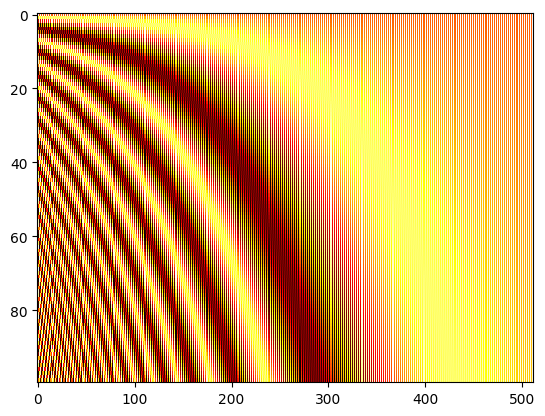

In [16]:
# generate positional encodings
a = generate_pe(100,512)

# plot them
plt.imshow(a, cmap = "hot", interpolation='nearest', aspect='auto')
plt.show()


## Plotting Different Positional Encodings in 2D

Now, let's use our `generate_pe()` function to plot a word embedding and see how it would look in different positions in our sequence.

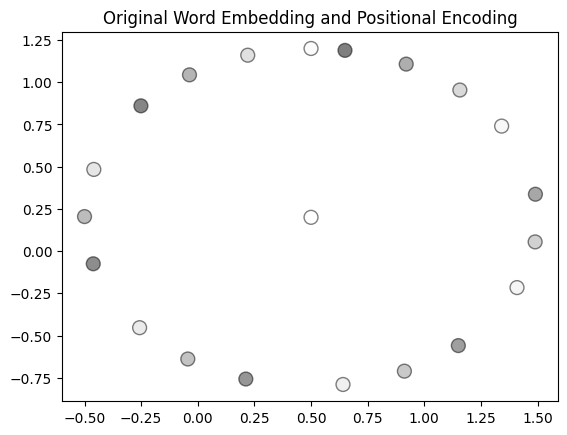

In [19]:
# number of positions
n_pos = 20

# generate positional encodings
a = generate_pe(n_pos,2)

# our original word embedding
word_embedding = np.array([0.5,0.2])

# create list of word embedding positions
w_e = [word_embedding]

# add word embedding to positional encodings
for i in a:
    w_e.append(i+word_embedding)

# create data frame
df = pd.DataFrame(w_e)
df.columns = ["x","y"]
df["pos"] = list(range(0,n_pos+1))

# plot
plt.scatter(df["x"], df["y"], s=100, c=df["pos"], alpha=0.5, cmap = "Greys",edgecolors='black')
plt.title("Original Word Embedding and Positional Encoding")
plt.show()

## Plotting the Sine and Cosine Curves
Lastly, let's plot the different sine and cosine curves that we're using in our positional encoding vector.

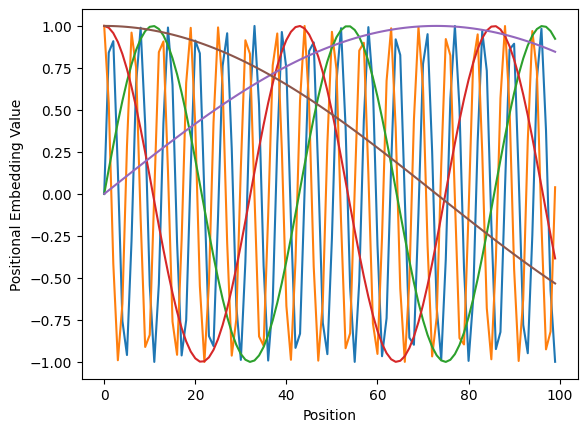

In [40]:
# generate positional encodings
a = generate_pe(100,6)

# make a data frame
a_df = pd.DataFrame(a)

# plot sine and cosines
for i in a_df.columns:
  if i != "pos":
    plt.plot(a_df[i])
plt.xlabel("Position")
plt.ylabel("Positional Embedding Value")
plt.show()

,0,1
0,0.000000,1.000000
1,0.841471,0.540302
2,0.909297,-0.416147
3,0.141120,-0.989992
4,-0.756802,-0.653644
5,-0.958924,0.283662
6,-0.279415,0.960170
7,0.656987,0.753902
8,0.989358,-0.145500
9,0.412118,-0.911130


# Why?

Positional encoding seems tedious, why do we bother with it?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "100"/>